In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
df = pd.read_csv('sample_data/mnist_test.csv')

In [ ]:
df

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
single_image=X_train[0]

In [ ]:
single_image.shape

(28, 28)

In [ ]:
single_image

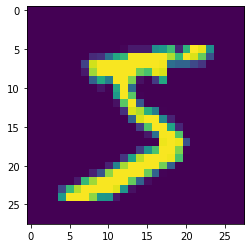

In [ ]:
plt.imshow(single_image)

In [ ]:
single_image.max()

255

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

on va passer les labels en one hot encoding 

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_cat_train = to_categorical(y_train, 10)

normalisaion des données 

In [ ]:
X_train = X_train/255
X_test = X_test / 255

In [ ]:
scaled_image = X_train[0]

In [ ]:
scaled_image.max()

1.0

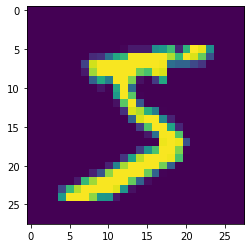

In [ ]:
plt.imshow(scaled_image)

In [ ]:
X_train.shape

(60000, 28, 28)

ajouter une dimension pour dire qu il sagit d'une seule couleur

In [ ]:
X_train = X_train.reshape(60000,28,28,1)#batch_size, width, height, color_chanel

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1), input_shape=(28,28,1),activation='relu'))#input shape : param fixe
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())#transforme notre tableau en 2 dimmension 28*28 en un tableau de 1seule dim de 784, param fixe
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))#10 neuronnes car 10 classes, softmax car c est une classification multiclasse param fixe
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#categorical_crossentropy car c'est un probleme
#de classification multiclasse

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [ ]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2838 - accuracy: 0.9164 - val_loss: 0.0590 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.0408 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0369 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0392 - val_accuracy: 0.9875


In [ ]:
metrics = pd.DataFrame(model.history.history)

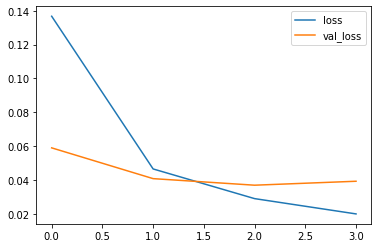

In [ ]:
metrics[['loss','val_loss']].plot()

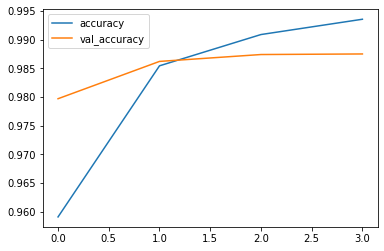

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0392 - accuracy: 0.9875


[0.03922862559556961, 0.987500011920929]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
fi = X_test[0]
fi = fi.reshape(1,28,28,1)

In [ ]:
prediction = np.argmax(model.predict(X_test),axis=1)#axis pour qu on dise qu'il trouve larg max le long des colonnes 

In [ ]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test,prediction)

array([[ 973,    0,    2,    1,    1,    1,    2,    0,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [   0,    1, 1023,    2,    1,    0,    0,    3,    2,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    0,    2,    0],
       [   0,    0,    1,    0,  974,    0,    3,    0,    0,    4],
       [   0,    0,    0,   10,    0,  879,    3,    0,    0,    0],
       [   5,    1,    0,    0,    2,    2,  946,    0,    2,    0],
       [   0,    2,   11,    1,    1,    0,    0, 1010,    1,    2],
       [   4,    1,    2,    3,    2,    1,    4,    3,  952,    2],
       [   1,    1,    1,    2,   12,    2,    0,   10,    1,  979]])

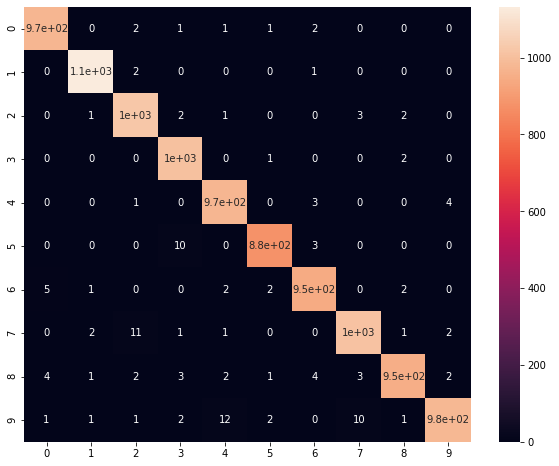

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [ ]:
my_number = X_test[9]

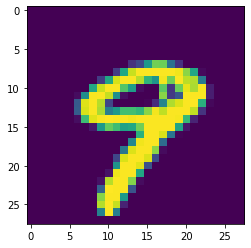

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)),axis=1) #num image, width, heigth, color chanel

array([9])